In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import scale as sk_scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR

%matplotlib inline

In [32]:
fires = utils.wrangle()

In [33]:
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log,small
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,True
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,True
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,True
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,True
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,True


In [3]:
def scale(train, test=None):
    ss = SS()
    x = ss.fit_transform(train)
    if train!=None:
        y = ss.transform(test)
        return x, y
    else:
        return x

# Ridge Regression

In [4]:
X = fires[fires.columns[4:12]].copy()
X[:] = sk_scale(X)
y1, y2 = sk_scale(fires[['area']]), sk_scale(fires[['log']])

In [5]:
Xtr, Xte, y1tr, y1te, y2tr, y2te = train_test_split(
    X, y1, y2, random_state=7)

In [6]:
a = [1000]
ridge1 = RidgeCV(alphas=a)
ridge1 = ridge1.fit(Xtr, y1tr)
print(ridge1.score(Xte, y1te), ridge1.alpha_)

0.000979431188506 1000


In [7]:
ridge2 = RidgeCV(alphas=a)
ridge2 = ridge2.fit(Xtr, y2tr)
print(ridge2.score(Xte, y2te), ridge2.alpha_)

-0.0237321334568 1000


### non-scaled

In [8]:
X = fires[fires.columns[4:12]].copy()
y1, y2 = fires[['area']].copy(), fires[['log']].copy()

Xtr, Xte, y1tr, y1te, y2tr, y2te = train_test_split(
    X, y1, y2, random_state=7)

In [9]:
a = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
ridge1 = RidgeCV(alphas=a)
ridge1 = ridge1.fit(Xtr, y1tr)
print("R^2: ",ridge1.score(Xte, y1te), "with alpha: ", ridge1.alpha_)

R^2:  -0.0252006578942 with alpha:  10000.0


In [10]:
a = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
ridge2 = RidgeCV(alphas=a)
ridge2 = ridge2.fit(Xtr, y2tr)
print("R^2: ",ridge2.score(Xte, y2te), "with alpha: ", ridge2.alpha_)

R^2:  -0.0253863118922 with alpha:  10000.0


# ElasticNet 

### non-scaled

In [11]:
X = fires[fires.columns[4:12]].copy()
y1, y2 = fires['area'].copy(), fires['log'].copy()

Xtr, Xte, y1tr, y1te, y2tr, y2te = train_test_split(
    X, y1, y2, random_state=7)

In [12]:
l1s = [.1, .5, .7, .9, .95, .99, 1]
net1 = ElasticNetCV(l1_ratio=l1s)
net1 = net1.fit(Xtr, y1tr)
print("R^2 :", net1.score(Xte, y1te), "alpha: ", net1.alpha_, "l1: ", net1.l1_ratio_)

R^2 : -0.025682691519 alpha:  10.802796017 l1:  0.1


In [13]:
l1s = [.1, .5, .7, .9, .95, .99, 1]
net2 = ElasticNetCV(l1_ratio=l1s)
net2 = net2.fit(Xtr, y2tr)
print("R^2 :", net2.score(Xte, y2te), "alpha: ", net2.alpha_, "l1: ", net2.l1_ratio_)

R^2 : -0.0292347162203 alpha:  263.1390438 l1:  0.1


### scaled

In [14]:
X = fires[fires.columns[4:12]].copy()
X[:] = sk_scale(X)
y1, y2 = sk_scale(fires['area']), sk_scale(fires['log'])

Xtr, Xte, y1tr, y1te, y2tr, y2te = train_test_split(
    X, y1, y2, random_state=7)

In [15]:
l1s = [.1, .5, .7, .9, .95, .99, 1]
net1 = ElasticNetCV(l1_ratio=l1s)
net1 = net1.fit(Xtr, y1tr)
print("R^2 :", net1.score(Xte, y1te), "alpha: ", net1.alpha_, "l1: ", net1.l1_ratio_)

R^2 : -0.0107080584454 alpha:  0.0846640551719 l1:  0.1


In [16]:
l1s = [.1, .5, .7, .9, .95, .99, 1]
net2 = ElasticNetCV(l1_ratio=l1s)
net2 = net2.fit(Xtr, y2tr)
print("R^2 :", net2.score(Xte, y2te), "alpha: ", net2.alpha_, "l1: ", net2.l1_ratio_)

R^2 : -0.0292347162203 alpha:  0.760004165201 l1:  0.1


# Lasso Lars

### non-scaled

In [17]:
X = fires[fires.columns[4:12]].copy()
y1, y2 = fires['area'].copy(), fires['log'].copy()

Xtr, Xte, y1tr, y1te, y2tr, y2te = train_test_split(
    X, y1, y2, random_state=7)

In [18]:
l1 = LassoLarsCV()
l1 = l1.fit(Xtr, y1tr)
print("R^2 :", l1.score(Xte, y1te))

R^2 : -0.0111905739914


In [19]:
l2 = LassoLarsCV()
l2 = l2.fit(Xtr, y2tr)
print("R^2 :", l2.score(Xte, y2te))

R^2 : -0.0292347162203


### scaled

In [20]:
X = fires[fires.columns[4:12]].copy()
X[:] = sk_scale(X)
y1, y2 = sk_scale(fires['area']), sk_scale(fires['log'])

Xtr, Xte, y1tr, y1te, y2tr, y2te = train_test_split(
    X, y1, y2, random_state=7)

In [21]:
l1 = LassoLarsCV()
l1 = l1.fit(Xtr, y1tr)
print("R^2 :", l1.score(Xte, y1te))

R^2 : -0.0111905739914


In [22]:
l2 = LassoLarsCV()
l2 = l2.fit(Xtr, y2tr)
print("R^2 :", l2.score(Xte, y2te))

R^2 : -0.0292347162203


# SVR

In [58]:
X = fires[fires.columns[4:12]].copy()
X[:] = sk_scale(X)
y1, y2 = sk_scale(fires['area']), sk_scale(fires['log'])

Xtr, Xte, y1tr, y1te, y2tr, y2te = train_test_split(
    X, y1, y2, random_state=8)

### Linear

In [24]:
for c in [1, 10, 20, 30, 40, 50, 100]:
    print("c = ", c)
    svr1 = SVR(kernel='linear', C=c)
    svr1 = svr1.fit(Xtr, y1tr)
    print("\tR^2: ", svr1.score(Xte, y1te))
    svr2 = SVR(kernel='linear', C=c)
    svr2 = svr1.fit(Xtr, y2tr)
    print("\tR^2: ", svr2.score(Xte, y2te))


c =  1
	R^2:  -0.0154285225078
	R^2:  -0.252046325314
c =  10
	R^2:  -0.0153777932806
	R^2:  -0.25117385287
c =  20
	R^2:  -0.0153752029956
	R^2:  -0.25132944789
c =  30
	R^2:  -0.0154280666751
	R^2:  -0.25222877453
c =  40
	R^2:  -0.0154332562122
	R^2:  -0.251308384774
c =  50
	R^2:  -0.0153809429478
	R^2:  -0.252177404602
c =  100
	R^2:  -0.0154041821296
	R^2:  -0.251475706872


### Rbf

In [59]:
c=0.5
for e in [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1]:
    print("e = ", e)
    svr1 = SVR(kernel='rbf', C=c, epsilon=e)
    svr1 = svr1.fit(Xtr, y1tr)
    print("\tR^2: ", svr1.score(Xte, y1te))
    svr2 = SVR(kernel='rbf', C=c, epsilon=e)
    svr2 = svr1.fit(Xtr, y2tr)
    print("\tR^2: ", svr2.score(Xte, y2te))


e =  0.01
	R^2:  -0.0404620962962
	R^2:  -0.128061609782
e =  0.05
	R^2:  -0.0294831729139
	R^2:  -0.130257024258
e =  0.1
	R^2:  -0.0174785593783
	R^2:  -0.120457457846
e =  0.15
	R^2:  -0.00775954797796
	R^2:  -0.107353573606
e =  0.2
	R^2:  -0.00244077206994
	R^2:  -0.0960329843433
e =  0.25
	R^2:  -0.000882772810449
	R^2:  -0.0943904059509
e =  0.5
	R^2:  -0.0441827557169
	R^2:  -0.0318755441964
e =  0.75
	R^2:  -0.198466780478
	R^2:  0.00407310704911
e =  1
	R^2:  -0.455601834443
	R^2:  -0.0420768471257


In [ ]:
c=0.5
for e in [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1]:
    print("e = ", e)
    svr1 = SVR(kernel='rbf', C=c, epsilon=e)
    svr1 = svr1.fit(Xtr, y1tr)
    print("\tR^2: ", svr1.score(Xte, y1te))
    svr2 = SVR(kernel='rbf', C=c, epsilon=e)
    svr2 = svr1.fit(Xtr, y2tr)
    print("\tR^2: ", svr2.score(Xte, y2te))

### poly

In [26]:
#[0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1]:
e=0.1
for c in [-10, -5, -.01,0, 0.1, 0.5, 0.75, 1,1.25, 1.5, 2, 5, 10]:
    print("c = ", c)
    svr1 = SVR(kernel='poly', degree=2, coef0=c, epsilon=e)
    svr1 = svr1.fit(Xtr, y1tr)
    print("\tR^2: ", svr1.score(Xte, y1te))
    svr2 = SVR(kernel='poly', degree=2, coef0=c, epsilon=e)
    svr2 = svr1.fit(Xtr, y2tr)
    print("\tR^2: ", svr2.score(Xte, y2te))

c =  -10
	R^2:  -3754448.07399
	R^2:  -4213073.49323
c =  -5
	R^2:  -918089.111313
	R^2:  -1030022.09476
c =  -0.01
	R^2:  -8.60265823328
	R^2:  -2.12801011632
c =  0
	R^2:  -0.0161125383611
	R^2:  -1.00267605424
c =  0.1
	R^2:  -0.0165616425112
	R^2:  -0.142764349352
c =  0.5
	R^2:  -0.0165556365968
	R^2:  -0.185886594253
c =  0.75
	R^2:  -0.0168080467471
	R^2:  -0.176376070132
c =  1
	R^2:  -0.0167143231956
	R^2:  -0.16318133493
c =  1.25
	R^2:  -0.0164914083167
	R^2:  -0.155335753752
c =  1.5
	R^2:  -0.0164657034162
	R^2:  -0.14821380855
c =  2
	R^2:  -0.0166076663174
	R^2:  -0.140731937213
c =  5
	R^2:  -0.0166575768501
	R^2:  -0.131978684586
c =  10
	R^2:  -0.0165653517371
	R^2:  -0.135105980467


# PCA

In [46]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns

In [47]:
X1 = fires[fires.columns[4:8]].copy()
X2 = fires[fires.columns[8:12]].copy()
y = fires['log'].copy()
pca = PCA(n_components=2).fit(X2)
transformed = pca.transform(X2)

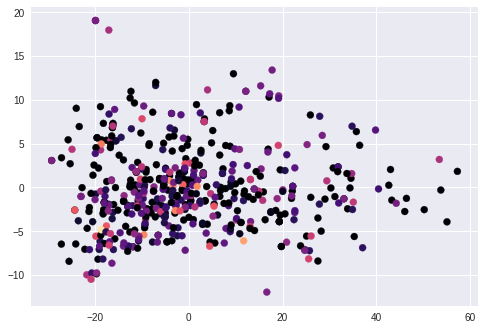

In [50]:
plt.scatter(transformed[:,0], transformed[:,1], c=y, cmap=plt.cm.magma)

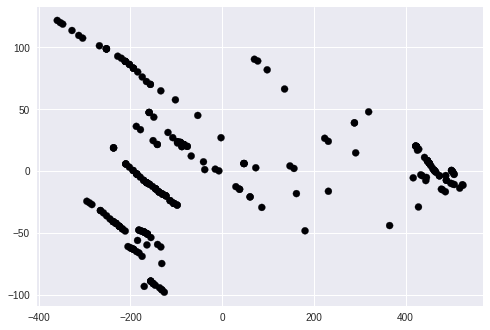

In [56]:
pca = PCA(n_components=2).fit(X1[fires.small==True])
transformed = pca.transform(X1[fires.small==True])
plt.scatter(transformed[:,0], transformed[:,1], c=y[fires.small==True], cmap=plt.cm.magma)

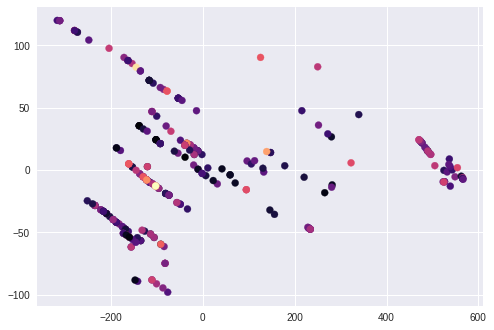

In [57]:
pca = PCA(n_components=2).fit(X1[fires.small==False])
transformed = pca.transform(X1[fires.small==False])
plt.scatter(transformed[:,0], transformed[:,1], c=y[fires.small==False], cmap=plt.cm.magma)